<a href="https://colab.research.google.com/github/aabitokh/home_repo/blob/develop/keras_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import (Dense, Flatten, 
                                    Dropout, BatchNormalization, 
                                    Conv2D, MaxPooling2D)
import tensorflow as tf

Обучение завершено
1/1 [==============================] - 0s 392ms/step
[[211.33199]]
[array([[1.8214442]], dtype=float32), array([29.187578], dtype=float32)]


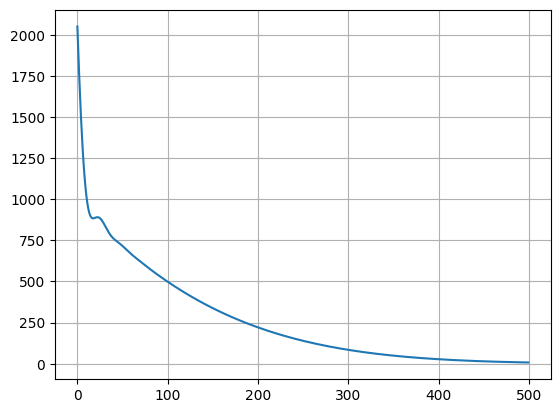

In [ ]:
#цель перевести сельсии в фарингейты 
c = np.array([-40, -10, 0, 8, 15, 22, 38])
f = np.array([-40, 14, 32, 46, 59, 72, 100])

#модель многослойной нейронки 
model = keras.Sequential()
#добавить слой 
model.add(Dense(units=1, input_shape=(1,), activation='linear'))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.1))

history = model.fit(c, f, epochs=500, verbose=0)
print("Обучение завершено")

print(model.predict([100]))
print(model.get_weights())

plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

# тест мнист

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

11490434/11490434 [==============================] - 0s 0us/step


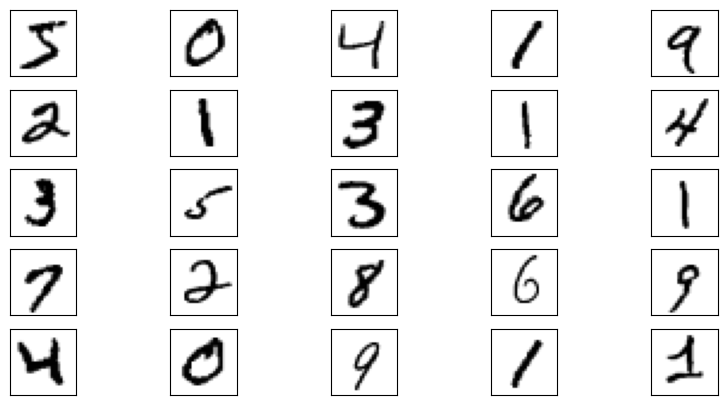

In [ ]:
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

In [ ]:
model = keras.Sequential([
    #первый слой вытаскиает картинки в вектор 
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    BatchNormalization(), 
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    #Dropout(0.5), 
    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                      

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

model.evaluate(x_test, y_test_cat)

Epoch 1/5
1500/1500 [==============================] - 19s 10ms/step - loss: 0.2514 - accuracy: 0.9231 - val_loss: 0.1304 - val_accuracy: 0.9604
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1190 - accuracy: 0.9629 - val_loss: 0.1193 - val_accuracy: 0.9638
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0909 - accuracy: 0.9709 - val_loss: 0.1104 - val_accuracy: 0.9677
Epoch 4/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0743 - accuracy: 0.9765 - val_loss: 0.1219 - val_accuracy: 0.9642
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0908 - accuracy: 0.9717


[0.09083005040884018, 0.9717000126838684]

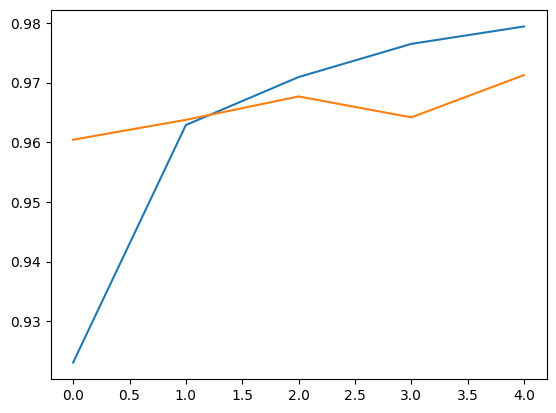

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

1/1 [==============================] - 0s 144ms/step
[[9.9999571e-01 3.6612147e-09 2.0943740e-07 3.6511679e-08 1.7793488e-08
  3.1701617e-09 1.8387155e-08 8.1395183e-07 5.5354496e-07 2.6309840e-06]]
это же ебаная 0


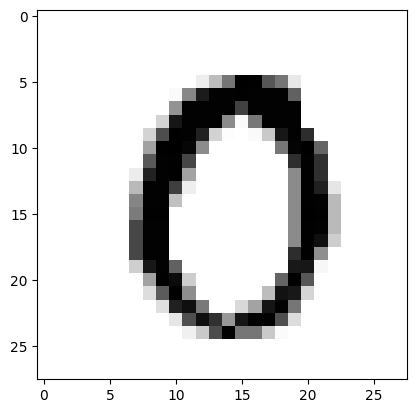

In [ ]:
n = 13
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print('это же ебаная',  np.argmax(res) )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [ ]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])


313/313 [==============================] - 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [ ]:
# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = x_test[~mask]

print(x_false.shape)


[ True  True  True  True  True  True  True  True  True  True]
(283, 28, 28)


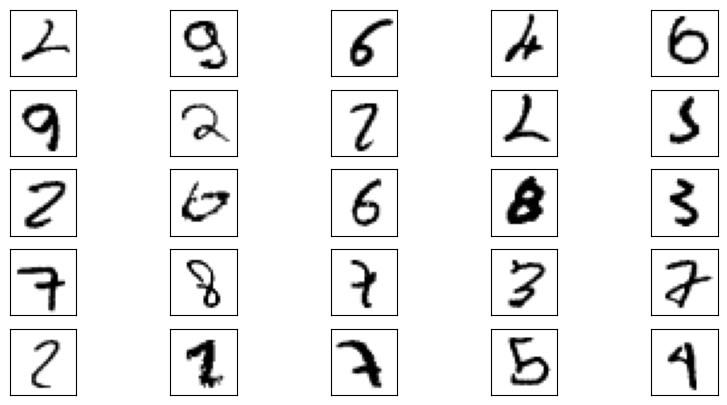

In [ ]:
# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()

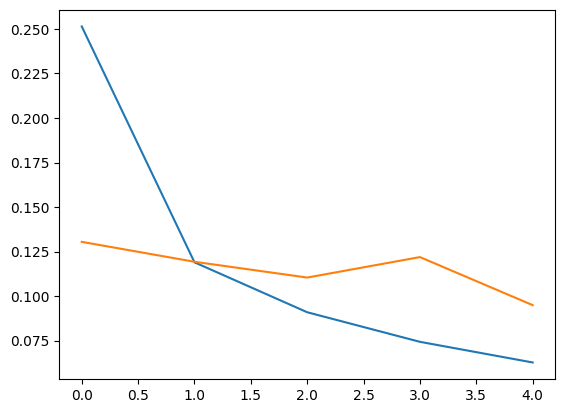

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

# свертки 

In [ ]:
model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

model.evaluate(x_test, y_test_cat)

Epoch 1/5
1500/1500 [==============================] - 82s 54ms/step - loss: 0.1427 - accuracy: 0.9557 - val_loss: 0.0630 - val_accuracy: 0.9815
Epoch 2/5
1500/1500 [==============================] - 80s 53ms/step - loss: 0.0458 - accuracy: 0.9852 - val_loss: 0.0490 - val_accuracy: 0.9860
Epoch 3/5
 593/1500 [==========>...................] - ETA: 44s - loss: 0.0302 - accuracy: 0.9899

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])

# VGG16

In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image


In [ ]:
model = keras.applications.VGG19()

In [ ]:
import os

os.listdir()[1]

In [ ]:
from PIL import Image

# Открываем изображение
file = '/content/400774aa086b4c9efc2eec7f7a3b84e2--kit-cars-cv-citroen.jpg'
img = Image.open(file)

# Меняем размер на 500x500
img = img.resize((224, 224))

# Сохраняем изображение
img.save('т.jpg')

In [ ]:
img = Image.open('т.jpg')
plt.imshow( img )

In [ ]:
# приводим к входному формату VGG-сети
img = np.array(img)
#print(img)
x = keras.applications.vgg19.preprocess_input(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)


In [ ]:
# прогоняем через сеть
res = model.predict( x )
print(np.argmax(res))

 817: 'sports car, sport car',

https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

# стилизация

In [ ]:
img = Image.open("/content/b941b0b198b89b4b9141ef928ca2c70a.jpg")
img = img.resize((224, 224))

img_style = Image.open('/content/57994cd5bb15dcfa44f7657fc90d8473.jpg')
img_style = img_style.resize((224, 224))

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow( img )
plt.subplot(1, 2, 2)
plt.imshow( img_style )
plt.show()

In [ ]:
x_img = keras.applications.vgg19.preprocess_input( np.expand_dims(img, axis=0) )
x_style = keras.applications.vgg19.preprocess_input(np.expand_dims(img_style, axis=0))

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow( x_img[0] )
plt.subplot(1, 2, 2)
plt.imshow( x_style[0] )
plt.show()

In [ ]:
def deprocess_img(processed_img):
  x = processed_img.copy()
  if len(x.shape) == 4:
    x = np.squeeze(x, 0)
  assert len(x.shape) == 3, ("Input to deprocess image must be an image of "
                             "dimension [1, height, width, channel] or [height, width, channel]")
  if len(x.shape) != 3:
    raise ValueError("Invalid input to deprocessing image")
  
  # perform the inverse of the preprocessing step
  x[:, :, 0] += 103.939
  x[:, :, 1] += 116.779
  x[:, :, 2] += 123.68
  x = x[:, :, ::-1]

  x = np.clip(x, 0, 255).astype('uint8')
  return x

In [ ]:
vgg = keras.applications.vgg19.VGG19(include_top=False, weights='imagenet')
vgg.trainable = False 

#всего берем 6 слоев из VGG19 
# Content layer where will pull our feature maps
content_layers = ['block5_conv2'] 

# Style layer we are interested in
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1'
               ]

In [ ]:
num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

In [ ]:
#что принимаем и что выдает слой (какие именно тензоры)
print(vgg.get_layer('block1_conv1').input)
print(vgg.get_layer('block1_conv1').output)

In [ ]:
style_outputs = [vgg.get_layer(name).output for name in style_layers]
content_outputs = [vgg.get_layer(name).output for name in content_layers]
model_outputs = style_outputs + content_outputs


In [ ]:
model_outputs

In [ ]:
style_outputs

In [ ]:
content_outputs

In [ ]:
#берем инпут модели 
#тензор цветных изображений 
vgg.input

In [ ]:
model = keras.models.Model(vgg.input, model_outputs)
for layer in model.layers:
    layer.trainable = False

In [ ]:
print(model.summary())      # вывод структуры НС в консоль

In [ ]:
#прогон изображения стиля через НС 

st = model(x_style)

In [ ]:
#возвращает тензоры с аутпутов всех слоев 
print(len(st))
print(st[0].shape)
print(st[1].shape)

In [ ]:
print(num_style_layers)
len(st[:num_style_layers])

test_tensor = st[0][0]

test_tensor.shape[-1]
print(test_tensor.shape) 
channels = int(test_tensor.shape[-1])
a = tf.reshape(test_tensor, [-1, channels])
print(a.shape)
n = tf.shape(a)[0]
print(n)
#n = tf.shape(a)[0]
#gram = tf.matmul(a, a, transpose_a=True)

In [ ]:
def get_content_loss(base_content, target):
  #типа mse разница между тензорами
  return tf.reduce_mean(tf.square(base_content - target))

def get_feature_representations(model):
  # batch compute content and style features
  #получаем аутпуты с каждого слоя модели
  #аутпуты будут чем-то вроде абстрактных характеристик изображений
  style_outputs = model(x_style)
  content_outputs = model(x_img)
  
  # Get the style and content feature representations from our model
  #собирает тензоры в список   
  style_features = [style_layer[0] for style_layer in style_outputs[:num_style_layers]]
  content_features = [content_layer[0] for content_layer in content_outputs[num_style_layers:]]
  return style_features, content_features

def gram_matrix(input_tensor):
  # We make the image channels first 
  #сколько каналов в тензоре
  channels = int(input_tensor.shape[-1])
  #вытягиваем в двумерную матрицу 
  a = tf.reshape(input_tensor, [-1, channels])
  #для нормирования
  n = tf.shape(a)[0]
  #помножаем вытянутый в матрицу тензор на такуюже матрицу 
  gram = tf.matmul(a, a, transpose_a=True)
  return gram / tf.cast(n, tf.float32)

def get_style_loss(base_style, gram_target):
  gram_style = gram_matrix(base_style)
  
  return tf.reduce_mean(tf.square(gram_style - gram_target))

def compute_loss(model, loss_weights, init_image, gram_style_features, content_features):
  style_weight, content_weight = loss_weights
  
  model_outputs = model(init_image)
  
  style_output_features = model_outputs[:num_style_layers]
  content_output_features = model_outputs[num_style_layers:]
  
  style_score = 0
  content_score = 0

  # Accumulate style losses from all layers
  # Here, we equally weight each contribution of each loss layer
  weight_per_style_layer = 1.0 / float(num_style_layers)
  for target_style, comb_style in zip(gram_style_features, style_output_features):
    style_score += weight_per_style_layer * get_style_loss(comb_style[0], target_style)
    
  # Accumulate content losses from all layers 
  weight_per_content_layer = 1.0 / float(num_content_layers)
  for target_content, comb_content in zip(content_features, content_output_features):
    content_score += weight_per_content_layer* get_content_loss(comb_content[0], target_content)
  
  style_score *= style_weight
  content_score *= content_weight

  # Get total loss
  loss = style_score + content_score 
  return loss, style_score, content_score


In [ ]:
num_iterations=100
content_weight=1e3
style_weight=1e-2

#берем карты признаков по контенту и стилю 
style_features, content_features = get_feature_representations(model)
#считаем матрицу грамма для карты признаков стиля 
gram_style_features = [gram_matrix(style_feature) for style_feature in style_features]

In [ ]:
init_image = np.copy(x_img)
init_image = tf.Variable(init_image, dtype=tf.float32)

opt = tf.compat.v1.train.AdamOptimizer(learning_rate=2, beta1=0.99, epsilon=1e-1)
iter_count = 1
best_loss, best_img = float('inf'), None
loss_weights = (style_weight, content_weight)

cfg = {
      'model': model,
      'loss_weights': loss_weights,
      'init_image': init_image,
      'gram_style_features': gram_style_features,
      'content_features': content_features
}


In [ ]:
norm_means = np.array([103.939, 116.779, 123.68])
min_vals = -norm_means
max_vals = 255 - norm_means
imgs = []


In [ ]:
for i in range(num_iterations):
    #вычисляем минимум лосс функции 
    with tf.GradientTape() as tape: 
       all_loss = compute_loss(**cfg)
    
    loss, style_score, content_score = all_loss
    #градиент для первоначального изображения 
    grads = tape.gradient(loss, init_image)
    #добавляем градиент к изначальному изображению (редактируем его )
    opt.apply_gradients([(grads, init_image)])
    clipped = tf.clip_by_value(init_image, min_vals, max_vals)
    init_image.assign(clipped)
    
    if loss < best_loss:
      # Update best loss and best image from total loss. 
      best_loss = loss
      best_img = deprocess_img(init_image.numpy())

      # Use the .numpy() method to get the concrete numpy array
      plot_img = deprocess_img(init_image.numpy())
      imgs.append(plot_img)
      print('Iteration: {}'.format(i))

In [ ]:
loss

In [ ]:
plt.imshow(best_img)
print(best_loss)

image = Image.fromarray(best_img.astype('uint8'), 'RGB')
image.save("result.jpg")
files.download("result.jpg")

In [ ]:
plt.imshow(best_img)

# colorization 

In [ ]:
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imsave
import numpy as np
from google.colab import files
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img, img_to_array, load_img

ImportError: ignored

In [ ]:
#upl = files.upload()
#names = list(upl.keys())
img = Image.open('/content/cats400_2.jpg')


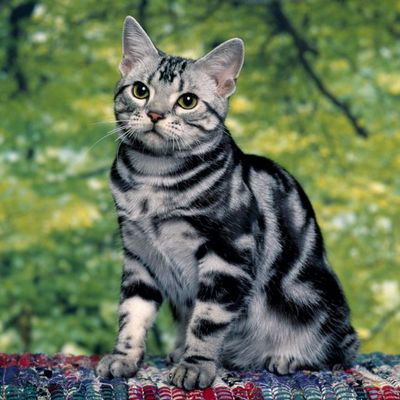

In [ ]:
img

In [ ]:
def processed_image(img):
  image = img.resize( (256, 256), Image.BILINEAR)
  image = np.array(image, dtype=float)
  size = image.shape
  lab = rgb2lab(1.0/255*image)
  X, Y = lab[:,:,0], lab[:,:,1:]

  Y /= 128    # нормируем выходные значение в диапазон от -1 до 1
  #яркостная компонента (чб)
  X = X.reshape(1, size[0], size[1], 1)
  #цветовая компонента
  Y = Y.reshape(1, size[0], size[1], 2)
  return X, Y, size

In [ ]:
X, Y, size = processed_image(img)


In [ ]:
X.shape

(1, 256, 256, 1)

In [ ]:
Y.shape

(1, 256, 256, 2)

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#укрупненный фильтр уменьшает карту признаков в два раза 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#увеличивает карту признаков в два раза 
#просто поэлементаное копирование 
#увеличиваем потому что уменьшали в два раза 
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 64)    640       
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 64)    36928     
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 128)   73856     
                                                                 
 conv2d_3 (Conv2D)           (None, None, None, 128)   147584    
                                                                 
 conv2d_4 (Conv2D)           (None, None, None, 256)   295168    
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 256)   590080    
                                                                 
 conv2d_6 (Conv2D)           (None, None, None, 512)   1

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.fit(x=X, y=Y, batch_size=1, epochs=50)


Epoch 1/50
1/1 [==============================] - 7s 7s/step - loss: 0.0825
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 0.6384
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 0.6875
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 0.7968
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 0.1199
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 0.0263
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 0.0219
Epoch 8/50
1/1 [==============================] - 1s 1s/step - loss: 0.0209
Epoch 9/50
1/1 [==============================] - 2s 2s/step - loss: 0.0201
Epoch 10/50
1/1 [==============================] - 1s 1s/step - loss: 0.0182
Epoch 11/50
1/1 [==============================] - 1s 1s/step - loss: 0.0170
Epoch 12/50
1/1 [==============================] - 1s 1s/step - loss: 0.0136
Epoch 13/50
1/1 [==============================] - 1s 1s/step - loss: 0.0126
Epoch 14

In [ ]:
#upl = files.upload()
#names = list(upl.keys())
img = Image.open('/content/original.jpg')


In [ ]:
X, Y, size = processed_image(img)

output = model.predict(X)

output *= 128
min_vals, max_vals = -128, 127
ab = np.clip(output[0], min_vals, max_vals)

1/1 [==============================] - 1s 503ms/step


In [ ]:
#тензор раскраски 
output

array([[[[-4.0898833 ,  5.809947  ],
         [-4.0898833 ,  5.809947  ],
         [-5.3758955 ,  6.9394875 ],
         ...,
         [-2.991281  ,  5.3832135 ],
         [-1.3871548 ,  4.2945333 ],
         [-1.3871548 ,  4.2945333 ]],

        [[-4.0898833 ,  5.809947  ],
         [-4.0898833 ,  5.809947  ],
         [-5.3758955 ,  6.9394875 ],
         ...,
         [-2.991281  ,  5.3832135 ],
         [-1.3871548 ,  4.2945333 ],
         [-1.3871548 ,  4.2945333 ]],

        [[-7.2241178 ,  8.926009  ],
         [-7.2241178 ,  8.926009  ],
         [-9.394201  ,  9.64035   ],
         ...,
         [-4.6426096 ,  5.331889  ],
         [-2.300353  ,  3.9598715 ],
         [-2.300353  ,  3.9598715 ]],

        ...,

        [[-2.1537917 ,  1.9212817 ],
         [-2.1537917 ,  1.9212817 ],
         [-2.0377607 ,  1.0078716 ],
         ...,
         [-1.4179251 ,  3.134331  ],
         [-1.4200207 ,  1.3366096 ],
         [-1.4200207 ,  1.3366096 ]],

        [[-1.5182784 ,  1.3602427 

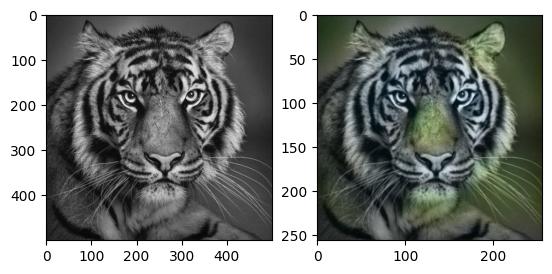

In [ ]:
cur = np.zeros((size[0], size[1], 3))
cur[:,:,0] = np.clip(X[0][:,:,0], 0, 100)
cur[:,:,1:] = ab
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(lab2rgb(cur))

# RNN 

## предсказывание символов 

In [ ]:
import numpy as np
import re

from tensorflow.keras.layers import Dense, SimpleRNN, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
with open('train_data_true.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    text = text.replace('\ufeff', '')  # убираем первый невидимый символ
    text = re.sub(r'[^А-я ]', '', text)  # заменяем все символы кроме кириллицы на пустые символы

In [ ]:
text

'Думайте позитивно и верьте в свою способность достигать отличных результатов Вы  лучший ответ на проблемы которые возникли в понедельникЕсли вы смогли в понедельник подняться с постели значит вы супер герой Твои утренние мысли в понедельник задают тон всей твоей неделе Живи так чтобы увидеть как ты становишься сильнее и живешь счастливой полноценной жизньюНе позволяйте утренним проблемам помешать вам быть успешнымТяжелые времена часто приводят к величайшим моментам вашей жизниПродолжайте двигаться Трудности в конце концов создают сильных людейНезависимо через что вы проходите в конце туннеля есть свет Может показаться что добраться до него сложно но вы сможете сделать этоЧем больше вы настроены позитивно и говорите я хочу иметь хорошую жизнь тем больше вы строите для себя эту реальностьПринятие позитивного отношения ко всему происходящему может творить чудесаХорошее настроение добавляет годы к вашей жизни весну к вашему шагу искорку в ваших глазахПриродные способности важны но вы може

In [ ]:
# парсим текст, как последовательность символов
num_characters = 34  # 33 буквы + пробел
tokenizer = Tokenizer(num_words=num_characters, char_level=True)  # токенизируем на уровне символов
tokenizer.fit_on_texts([text])  # формируем токены на основе частотности в нашем тексте
print(tokenizer.word_index)

{' ': 1, 'о': 2, 'е': 3, 'т': 4, 'и': 5, 'а': 6, 'н': 7, 'с': 8, 'в': 9, 'р': 10, 'м': 11, 'л': 12, 'ь': 13, 'д': 14, 'п': 15, 'у': 16, 'ы': 17, 'з': 18, 'я': 19, 'б': 20, 'ч': 21, 'к': 22, 'й': 23, 'ж': 24, 'г': 25, 'ш': 26, 'х': 27, 'ю': 28, 'ц': 29, 'щ': 30, 'э': 31, 'ф': 32, 'ъ': 33}


In [ ]:
inp_chars = 6
data = tokenizer.texts_to_matrix(text)  # преобразуем исходный текст в массив OHE
n = data.shape[0] - inp_chars  # так как мы предсказываем по трем символам - четвертый

In [ ]:
n

6301

In [ ]:
X = np.array([data[i:i + inp_chars, :] for i in range(n)])
Y = data[inp_chars:]  # предсказание следующего символа

print(data.shape)


(6307, 34)


In [ ]:
num_characters

34

In [ ]:
model = Sequential()

model.add(Input((inp_chars,
                 num_characters)))  # при тренировке в рекуррентные модели keras подается сразу вся последовательность, поэтому в input теперь два числа. 1-длина последовательности, 2-размер OHE
model.add(SimpleRNN(128, activation='tanh'))  # рекуррентный слой на 128 нейронов
model.add(Dense(num_characters, activation='softmax'))
print(model.summary())

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               20864     
                                                                 
 dense (Dense)               (None, 34)                4386      
                                                                 
Total params: 25,250
Trainable params: 25,250
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X, Y, batch_size=32, epochs=100)

Epoch 1/100
197/197 [==============================] - 5s 9ms/step - loss: 2.9708 - accuracy: 0.1866
Epoch 2/100
197/197 [==============================] - 2s 10ms/step - loss: 2.6255 - accuracy: 0.2698
Epoch 3/100
197/197 [==============================] - 2s 10ms/step - loss: 2.4390 - accuracy: 0.3092
Epoch 4/100
197/197 [==============================] - 2s 10ms/step - loss: 2.3076 - accuracy: 0.3388
Epoch 5/100
197/197 [==============================] - 1s 5ms/step - loss: 2.2144 - accuracy: 0.3572
Epoch 6/100
197/197 [==============================] - 1s 5ms/step - loss: 2.1448 - accuracy: 0.3688
Epoch 7/100
197/197 [==============================] - 1s 5ms/step - loss: 2.0859 - accuracy: 0.3909
Epoch 8/100
197/197 [==============================] - 1s 5ms/step - loss: 2.0457 - accuracy: 0.3964
Epoch 9/100
197/197 [==============================] - 1s 5ms/step - loss: 1.9956 - accuracy: 0.4064
Epoch 10/100
197/197 [==============================] - 1s 5ms/step - loss: 1.9583 - acc

In [ ]:
def buildPhrase(inp_str, str_len=50):
    for i in range(str_len):
        x = []
        for j in range(i, i + inp_chars):
            x.append(tokenizer.texts_to_matrix(inp_str[j]))  # преобразуем символы в One-Hot-encoding

        x = np.array(x)
        inp = x.reshape(1, inp_chars, num_characters)

        pred = model.predict(inp)  # предсказываем OHE четвертого символа
        d = tokenizer.index_word[pred.argmax(axis=1)[0]]  # получаем ответ в символьном представлении

        inp_str += d  # дописываем строку

    return inp_str

In [ ]:
res = buildPhrase("утренн")
print(res)

1/1 [==============================] - 0s 25ms/step
утренни с претдощей позитивным и обнадеживающим выбирая 


## предсказвание слов

In [ ]:
import numpy as np

from tensorflow.keras.layers import Dense, SimpleRNN, Input, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.utils import to_categorical


In [ ]:
with open('/content/train_data_false.txt', 'r', encoding='utf-8') as f:
    texts = f.read()
    texts = texts.replace('\ufeff', '')  # убираем первый невидимый символ

In [ ]:
maxWordsCount = 1000
tokenizer = Tokenizer(num_words=maxWordsCount, 
                      filters='!–"—#$%&amp;()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r«»',
                      lower=True, split=' ', char_level=False)
tokenizer.fit_on_texts([texts])

In [ ]:
dist = list(tokenizer.word_counts.items())
print(dist[:10])

[('я', 19), ('притягиваю', 1), ('только', 18), ('плохое', 1), ('кому', 2), ('нужен', 2), ('с', 4), ('такой', 5), ('внешностью', 2), ('не', 55)]


In [ ]:
#заменяем слова на токен из словаря токенайзера 
data = tokenizer.texts_to_sequences([texts])
#OHE получившихся векторов 
res = to_categorical(data[0], num_classes=maxWordsCount)
print(res.shape)

(678, 1000)


In [ ]:
data

[[3,
  82,
  4,
  83,
  43,
  3,
  44,
  19,
  14,
  45,
  1,
  84,
  11,
  20,
  85,
  86,
  28,
  87,
  88,
  15,
  89,
  8,
  1,
  90,
  91,
  3,
  92,
  1,
  93,
  11,
  6,
  94,
  2,
  95,
  8,
  29,
  21,
  3,
  1,
  96,
  9,
  6,
  30,
  1,
  97,
  3,
  1,
  46,
  19,
  98,
  47,
  99,
  48,
  100,
  3,
  1,
  101,
  31,
  102,
  1,
  103,
  9,
  1,
  104,
  105,
  5,
  106,
  107,
  32,
  2,
  108,
  3,
  109,
  12,
  10,
  49,
  1,
  110,
  7,
  3,
  50,
  6,
  111,
  51,
  14,
  112,
  9,
  6,
  30,
  1,
  113,
  114,
  52,
  1,
  115,
  43,
  3,
  53,
  116,
  117,
  9,
  50,
  1,
  118,
  10,
  22,
  1,
  54,
  12,
  10,
  55,
  119,
  3,
  120,
  9,
  121,
  122,
  23,
  123,
  8,
  49,
  1,
  124,
  12,
  10,
  53,
  55,
  125,
  21,
  3,
  1,
  126,
  33,
  5,
  16,
  127,
  128,
  56,
  129,
  1,
  130,
  131,
  57,
  3,
  7,
  1,
  132,
  24,
  133,
  8,
  34,
  134,
  29,
  3,
  11,
  1,
  135,
  8,
  29,
  4,
  136,
  58,
  34,
  137,
  59,
  138,
  139,
  7,
  1,
  

In [ ]:
#предсказываем каждое 3 слово 
inp_words = 3
n = res.shape[0] - inp_words

X = np.array([res[i:i + inp_words, :] for i in range(n)])
Y = res[inp_words:]

In [ ]:
model = Sequential()
model.add(Input((inp_words, maxWordsCount)))
model.add(SimpleRNN(128, activation='tanh'))
model.add(Dense(maxWordsCount, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 128)               144512    
                                                                 
 dense_2 (Dense)             (None, 1000)              129000    
                                                                 
Total params: 273,512
Trainable params: 273,512
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
history = model.fit(X, Y, batch_size=32, epochs=50)

Epoch 1/50
22/22 [==============================] - 1s 13ms/step - loss: 6.8947 - accuracy: 0.0193
Epoch 2/50
22/22 [==============================] - 0s 11ms/step - loss: 6.5133 - accuracy: 0.0904
Epoch 3/50
22/22 [==============================] - 0s 11ms/step - loss: 5.6819 - accuracy: 0.0815
Epoch 4/50
22/22 [==============================] - 0s 11ms/step - loss: 5.3971 - accuracy: 0.0815
Epoch 5/50
22/22 [==============================] - 0s 15ms/step - loss: 5.2838 - accuracy: 0.0815
Epoch 6/50
22/22 [==============================] - 0s 18ms/step - loss: 5.1988 - accuracy: 0.0815
Epoch 7/50
22/22 [==============================] - 0s 17ms/step - loss: 5.0968 - accuracy: 0.0815
Epoch 8/50
22/22 [==============================] - 0s 17ms/step - loss: 4.9771 - accuracy: 0.0815
Epoch 9/50
22/22 [==============================] - 0s 21ms/step - loss: 4.8453 - accuracy: 0.0844
Epoch 10/50
22/22 [==============================] - 0s 22ms/step - loss: 4.6830 - accuracy: 0.1022
Epoch 11/

In [ ]:
#заменяем слова на токен из словаря токенайзера 
data = tokenizer.texts_to_sequences([texts])
#OHE получившихся векторов 
res = to_categorical(data[0], num_classes=maxWordsCount)
print(res.shape)

In [ ]:
def buildPhrase(sample, str_len=20):
    res = sample
    data_new = tokenizer.texts_to_sequences([sample])[0]

    for i in range(str_len):
        x = to_categorical(data_new[i: i + inp_words], num_classes=maxWordsCount)  # преобразуем в One-Hot-encoding 
        inp = x.reshape(1, inp_words, maxWordsCount)
         

        pred = model.predict(inp)
        indx = pred.argmax(axis=1)[0]
        data_new.append(indx)

        res += " " + tokenizer.index_word[indx]  # дописываем строку

    return res

In [ ]:
res = buildPhrase("я притягиваю только плохое")
print(res)

1/1 [==============================] - 0s 76ms/step
я притягиваю только плохое плохое кому я нужен нужен с такой внешностью внешностью не доверяй в никому тебя обязательно а обманут если рискнешь порок


## Embedding

In [ ]:
data = tokenizer.texts_to_sequences([texts])
# res = to_categorical(data[0], num_classes=maxWordsCount)
# print(res.shape)
res = np.array( data[0] )

In [ ]:
res

array([  3,  82,   4,  83,  43,   3,  44,  19,  14,  45,   1,  84,  11,
        20,  85,  86,  28,  87,  88,  15,  89,   8,   1,  90,  91,   3,
        92,   1,  93,  11,   6,  94,   2,  95,   8,  29,  21,   3,   1,
        96,   9,   6,  30,   1,  97,   3,   1,  46,  19,  98,  47,  99,
        48, 100,   3,   1, 101,  31, 102,   1, 103,   9,   1, 104, 105,
         5, 106, 107,  32,   2, 108,   3, 109,  12,  10,  49,   1, 110,
         7,   3,  50,   6, 111,  51,  14, 112,   9,   6,  30,   1, 113,
       114,  52,   1, 115,  43,   3,  53, 116, 117,   9,  50,   1, 118,
        10,  22,   1,  54,  12,  10,  55, 119,   3, 120,   9, 121, 122,
        23, 123,   8,  49,   1, 124,  12,  10,  53,  55, 125,  21,   3,
         1, 126,  33,   5,  16, 127, 128,  56, 129,   1, 130, 131,  57,
         3,   7,   1, 132,  24, 133,   8,  34, 134,  29,   3,  11,   1,
       135,   8,  29,   4, 136,  58,  34, 137,  59, 138, 139,   7,   1,
       140, 141,  35,   2,   1, 142,   9,   7,   1, 143, 144, 14

In [ ]:
inp_words = 3
n = res.shape[0] - inp_words

X = np.array([res[i:i + inp_words] for i in range(n)])
Y = to_categorical(res[inp_words:], num_classes=maxWordsCount)


In [ ]:
X

array([[  3,  82,   4],
       [ 82,   4,  83],
       [  4,  83,  43],
       ...,
       [383,  24,   6],
       [ 24,   6, 384],
       [  6, 384,  26]])

In [ ]:
model = Sequential()
#вместо OHE 
model.add(Embedding(maxWordsCount, 256, input_length = inp_words))
#many 2 many слой 
#чтобы передать тензор той же формы дальше на следующий слой
#Если первый рекуррентный слой принимает на вход векторное представление слов,
# и так слово за словом, то второй рекуррентный слой принимает последовательность выходов предыд 
model.add(SimpleRNN(128, activation='tanh', return_sequences=True))

model.add(SimpleRNN(64, activation='tanh'))

model.add(Dense(maxWordsCount, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X, Y, batch_size=32, epochs=50)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3, 256)            256000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 3, 128)            49280     
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense_4 (Dense)             (None, 1000)              65000     
                                                                 
Total params: 382,632
Trainable params: 382,632
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
22/22 [==============================] - 6s 11ms/step - loss: 6.8851 - accuracy: 0.0267
Epoch 2/50
22/22 [==============================] - 0s 11ms/step - loss: 6.2157 -

In [ ]:
def buildPhrase(texts, str_len=20):
    res = texts
    data = tokenizer.texts_to_sequences([texts])[0]
    for i in range(str_len):
        # x = to_categorical(data[i: i + inp_words], num_classes=maxWordsCount)  # преобразуем в One-Hot-encoding
        # inp = x.reshape(1, inp_words, maxWordsCount)
        x = data[i: i + inp_words]
        inp = np.expand_dims(x, axis=0)

        pred = model.predict(inp)
        indx = pred.argmax(axis=1)[0]
        data.append(indx)

        res += " " + tokenizer.index_word[indx]  # дописываем строку

    return res


In [ ]:
res = buildPhrase("я притягиваю только плохое")
print(res)

1/1 [==============================] - 0s 23ms/step
я притягиваю только плохое плохое кому я нужен нужен с такой более внешностью не такой только никому тебя такой же обманут опыт такой я


In [ ]:
import numpy as np
 
def convolve(sequence, weights):
    convolution = np.zeros(len(sequence) - len(weights) + 1)
    for i in range(convolution.shape[0]):
        convolution[i] = np.sum(weights * sequence[i:i + len(weights)])
    return convolution

In [ ]:
s = np.array([2, 3, 5, 7, 11])
w = np.array([-1, 1]) 

In [ ]:
convolve(s,w)

array([1., 2., 2., 4.])

In [ ]:
np.array([1,-1]) @ np.array([2,3])

-1

In [ ]:
path = 'c/Users'

In [ ]:
print(path + '/final_files')

c/Users/final_files


# автоэкодеры  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist  # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input
from tensorflow.keras.utils import plot_model

In [ ]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(2, activation='linear')(x)

input_enc = Input(shape=(2,))
d = Dense(64, activation='relu')(input_enc)
d = Dense(28*28, activation='sigmoid')(d)
decoded = Reshape((28, 28, 1))(d)

encoder = keras.Model(input_img, encoded, name="encoder")
decoder = keras.Model(input_enc, decoded, name="decoder")

autoencoder = keras.Model(input_img, decoder(encoder(input_img)), name="autoencoder")
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 2)                 108866    
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         51152     
                                                                 
Total params: 160,018
Trainable params: 160,018
Non-trainable params: 0
_________________________________________________________________


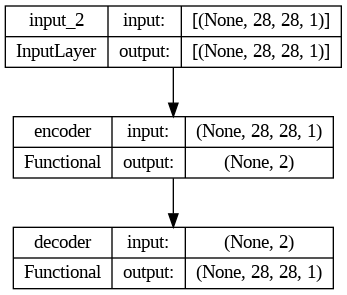

In [ ]:
plot_model(autoencoder, show_shapes=True)

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=batch_size,
                shuffle=True)

Epoch 1/20
600/600 [==============================] - 5s 7ms/step - loss: 0.0630
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0505
Epoch 3/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0483
Epoch 4/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0470
Epoch 5/20
600/600 [==============================] - 8s 14ms/step - loss: 0.0461
Epoch 6/20
600/600 [==============================] - 6s 11ms/step - loss: 0.0455
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0449
Epoch 8/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0444
Epoch 9/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0440
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0436
Epoch 11/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0433
Epoch 12/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0431
Epoch 13/20
600/600 [==

313/313 [==============================] - 1s 3ms/step


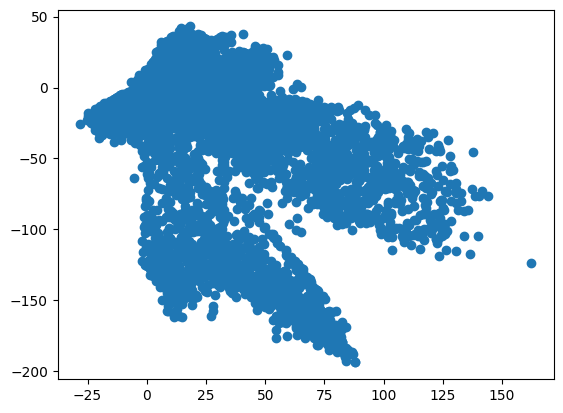

1/1 [==============================] - 0s 24ms/step


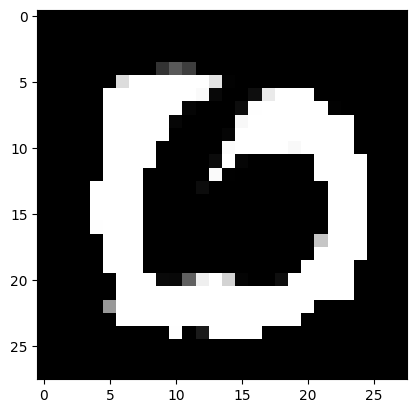

In [ ]:
h = encoder.predict(x_test)
a = plt.scatter(h[:, 0], h[:, 1])
plt.show()
img = decoder.predict(np.expand_dims([50, 250], axis=0))
plt.imshow(img.squeeze(), cmap='gray')

1/1 [==============================] - 0s 111ms/step


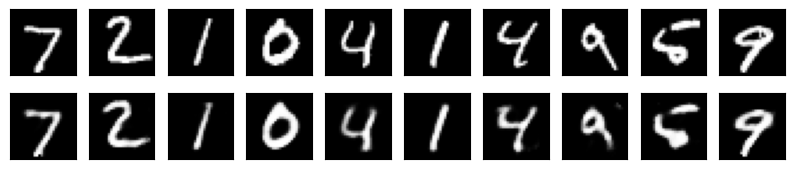

In [ ]:
n = 10

imgs = x_test[:n]
decoded_imgs = autoencoder.predict(x_test[:n], batch_size=n)

plt.figure(figsize=(n, 2))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(imgs[i].squeeze(), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax2 = plt.subplot(2, n, i + n + 1)
  plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
  ax2.get_xaxis().set_visible(False)
  ax2.get_yaxis().set_visible(False)

plt.show()


In [ ]:
def plot_digits(*images):
  images = [x.squeeze() for x in images]
  n = images[0].shape[0]  # число изображений

  plt.figure(figsize=(n, len(images)))
  for j in range(n):
    for i in range(len(images)):
      ax = plt.subplot(len(images), n, i * n + j + 1)
      plt.imshow(images[i][j])
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

  plt.show()


def plot_homotopy(frm, to, n=10, autoencoder=None):
  z = np.zeros(([n] + list(frm.shape)))
  for i, t in enumerate(np.linspace(0., 1., n)):
    z[i] = frm * (1 - t) + to * t  # Гомотопия по прямой
  if autoencoder:
    plot_digits(autoencoder.predict(z, batch_size=n))
  else:
    plot_digits(z)

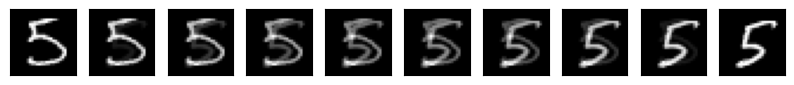

1/1 [==============================] - 0s 22ms/step


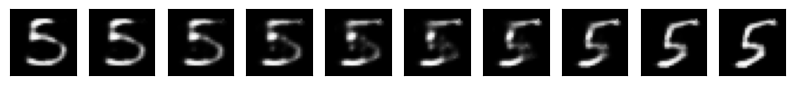

In [ ]:
frm, to = x_test[y_test == 5][1:3]
plot_homotopy(frm, to)
plot_homotopy(frm, to, autoencoder=autoencoder)

# vae

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
import keras.backend as K
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Lambda, BatchNormalization, Dropout

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))

In [ ]:
def dropout_and_batch(x):
  #к слою х привязывакм сначала батч нормализацию потом дропаут
  return Dropout(0.3)(BatchNormalization()(x))


def noiser(args):
  global z_mean, z_log_var
  z_mean, z_log_var = args
  N = K.random_normal(shape=(batch_size, hidden_dim), mean=0., stddev=1.0)
  return K.exp(z_log_var / 2) * N + z_mean


In [ ]:
#размерность вектора скрытого состояния после декодера 
hidden_dim = 2

batch_size = 60 # должно быть кратно 60 000

#энкодер 
input_img = Input((28, 28, 1))
x = Flatten()(input_img)
x = Dense(256, activation='relu')(x)
x = dropout_and_batch(x)
x = Dense(128, activation='relu')(x)
x = dropout_and_batch(x)
#слои которые формируют математическое ожидание и дисперсию для слоя скрытого состояния 
#к одному последнему слою мы вяжем 2 новых, получается развлика 
z_mean = Dense(hidden_dim)(x)
z_log_var = Dense(hidden_dim)(x)

#ламбда слой позволет сделать слой с авторским функционалом 
#например выполнить функцию noiser к входящим векторам z_mean, z_log_var
#и выдать слой скрытого состояни, сформированный по заданым законам распределения 
h = Lambda(noiser, output_shape=(hidden_dim,))([z_mean, z_log_var])

#декодер 
input_dec = Input(shape=(hidden_dim,))
d = Dense(128, activation='relu')(input_dec)
d = dropout_and_batch(d)
d = Dense(256, activation='relu')(d)
d = dropout_and_batch(d)
d = Dense(28*28, activation='sigmoid')(d)
decoded = Reshape((28, 28, 1))(d)

#базисные модели для архитектуры енкодер-декодер 
encoder = keras.Model(input_img, h, name='encoder')
decoder = keras.Model(input_dec, decoded, name='decoder')

vae = keras.Model(input_img, decoder(encoder(input_img)), name="vae")


In [ ]:
def vae_loss(x, y):
  x = K.reshape(x, shape=(batch_size, 28*28))
  y = K.reshape(y, shape=(batch_size, 28*28))
  #первая функция потерь 
  loss = K.sum(K.square(x-y), axis=-1)
  #функция потерь, которая следит, чтобы распредение веткора скрытого состояния 
  #отвечало заданным критериям 
  kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
  return loss + kl_loss

In [ ]:
vae.compile(optimizer='adam', loss=vae_loss)
vae.summary()

Model: "vae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (60, 2)                   235908    
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         236432    
                                                                 
Total params: 472,340
Trainable params: 470,804
Non-trainable params: 1,536
_________________________________________________________________


In [ ]:
vae.fit(x_train, x_train, epochs=5, batch_size=batch_size, shuffle=True)

Epoch 1/5
1000/1000 [==============================] - 24s 18ms/step - loss: 68.2532
Epoch 2/5
1000/1000 [==============================] - 18s 18ms/step - loss: 46.9800
Epoch 3/5
1000/1000 [==============================] - 22s 22ms/step - loss: 44.7042
Epoch 4/5
1000/1000 [==============================] - 14s 14ms/step - loss: 43.5764
Epoch 5/5
1000/1000 [==============================] - 15s 15ms/step - loss: 43.0565


100/100 [==============================] - 0s 3ms/step


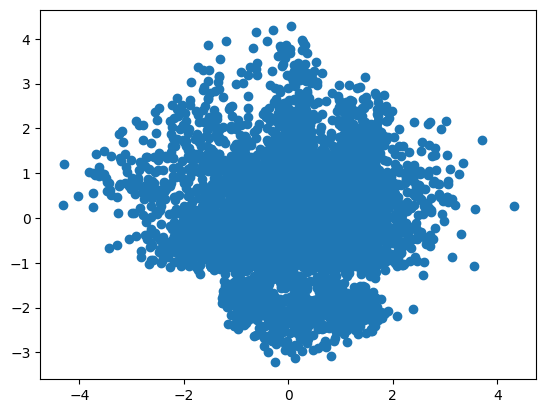

In [ ]:
h = encoder.predict(x_test[:6000], batch_size=batch_size)
plt.scatter(h[:, 0], h[:, 1])

1/1 [==============================] - 0s 22ms/step


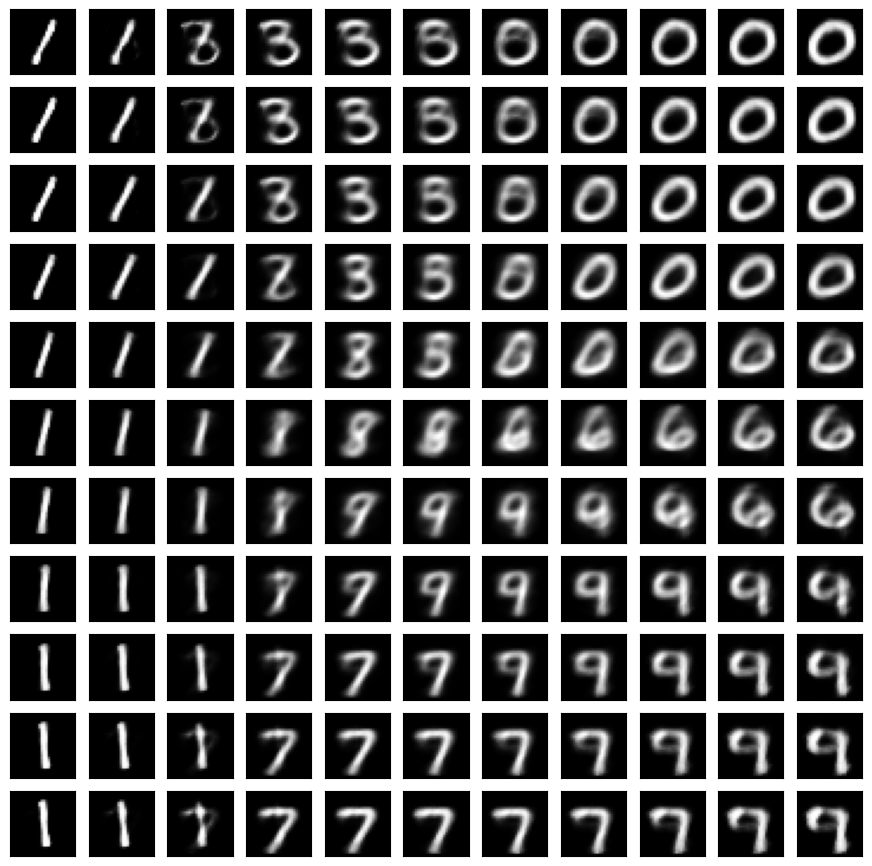

In [ ]:
n = 5
total = 2*n+1

plt.figure(figsize=(total, total))

num = 1
for i in range(-n, n+1):
  for j in range(-n, n+1):
    ax = plt.subplot(total, total, num)
    num += 1
    img = decoder.predict(np.expand_dims([3*i/n, 3*j/n], axis=0))
    plt.imshow(img.squeeze(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# расширенный VAE 
чуть более глубокое скрытое пространство + добавить метки классов 

In [ ]:
from tensorflow.keras.layers import concatenate


In [ ]:
hidden_dim = 2
num_classes = 10
batch_size = 100  # должно быть кратно 60 000 и 10 0000


In [ ]:
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
input_img = Input(shape=(28, 28, 1))

fl = Flatten()(input_img)
#второй входной слой для метки класса в декодер 
lb = Input(shape=(num_classes,))
#объединям два входа в одно единое целое 
x = concatenate([fl, lb])

x = Dense(256, activation='relu')(x)
x = dropout_and_batch(x)
x = Dense(128, activation='relu')(x)
x = dropout_and_batch(x)


z_mean2 = Dense(hidden_dim)(x)
z_log_var = Dense(hidden_dim)(x)
#вектор скрытого пространства 
h = Lambda(noiser, output_shape=(hidden_dim,))([z_mean2, z_log_var])

#декодер с двумя входами 
input_dec = Input(shape=(hidden_dim,))
lb_dec = Input(shape=(num_classes,))
#объединяем 
d = concatenate([input_dec, lb_dec])

d = Dense(128, activation='elu')(d)
d = dropout_and_batch(d)
d = Dense(256, activation='elu')(d)
d = dropout_and_batch(d)
d = Dense(28*28, activation='sigmoid')(d)
#результат декодера 
decoded = Reshape((28, 28, 1))(d)

#модели со списком инпутов 
encoder = keras.Model([input_img, lb], h, name='encoder')
decoder = keras.Model([input_dec, lb_dec], decoded, name='decoder')
#общая модель 
cvae = keras.Model([input_img, lb, lb_dec], decoder([encoder([input_img, lb]), lb_dec]), name="cvae")


z_meaner = keras.Model([input_img, lb], z_mean2)
tr_style = keras.Model([input_img, lb, lb_dec], decoder([z_meaner([input_img, lb]), lb_dec]), name='tr_style')

In [ ]:
cvae.compile(optimizer='adam', loss=vae_loss)
cvae.fit([x_train, y_train_cat, y_train_cat], x_train, epochs=5, batch_size=batch_size, shuffle=True)

Epoch 1/5
600/600 [==============================] - 15s 18ms/step - loss: 61.6126
Epoch 2/5
600/600 [==============================] - 11s 18ms/step - loss: 37.8028
Epoch 3/5
600/600 [==============================] - 11s 18ms/step - loss: 36.6718
Epoch 4/5
600/600 [==============================] - 10s 17ms/step - loss: 36.1115
Epoch 5/5
600/600 [==============================] - 10s 17ms/step - loss: 35.7552


100/100 [==============================] - 1s 6ms/step


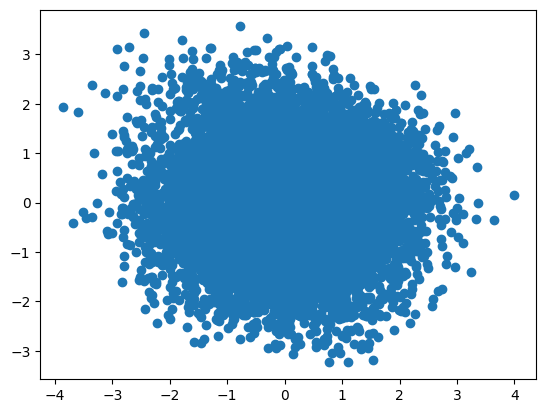

In [ ]:
lb = lb_dec = y_test_cat
h = encoder.predict([x_test, lb], batch_size=batch_size)
plt.scatter(h[:, 0], h[:, 1])

1/1 [==============================] - 0s 40ms/step


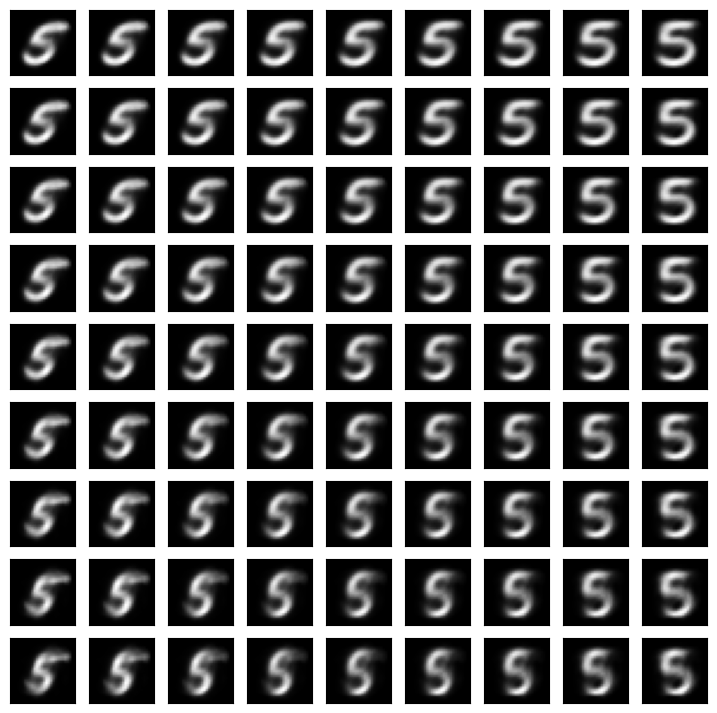

In [ ]:
n = 4
total = 2*n+1
input_lbl = np.zeros((1, num_classes))
input_lbl[0, 5] = 1

plt.figure(figsize=(total, total))

h = np.zeros((1, hidden_dim))
num = 1
for i in range(-n, n+1):
  for j in range(-n, n+1):
    ax = plt.subplot(total, total, num)
    num += 1
    h[0, :] = [1*i/n, 1*j/n]
    img = decoder.predict([h, input_lbl])
    plt.imshow(img.squeeze(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

с помощью передачи лейбла можно взять стиль из передаваемой цифры и отразить этот стиль с цифром лейбла 

взять двойку, скопировать ее стиль и в нем нарисовать пятерку

In [ ]:
def plot_digits(*images):
    images = [x.squeeze() for x in images]
    n = min([x.shape[0] for x in images])
    
    plt.figure(figsize=(n, len(images)))
    for j in range(n):
        for i in range(len(images)):
            ax = plt.subplot(len(images), n, i*n + j + 1)
            plt.imshow(images[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()


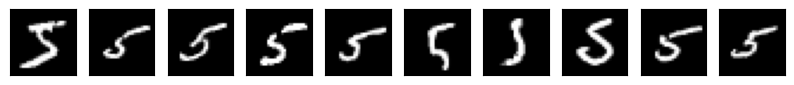

1/1 [==============================] - 0s 269ms/step


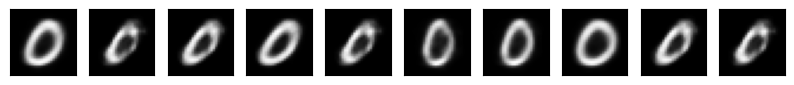

1/1 [==============================] - 0s 45ms/step


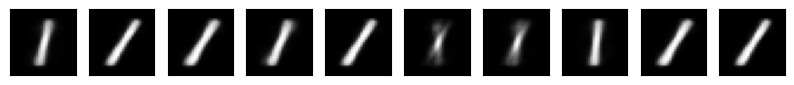

1/1 [==============================] - 0s 44ms/step


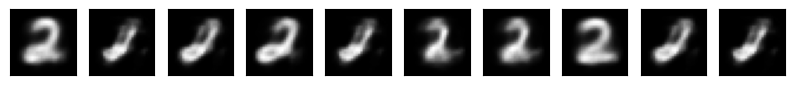

1/1 [==============================] - 0s 38ms/step


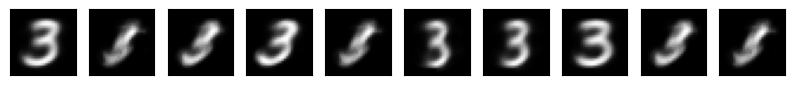

1/1 [==============================] - 0s 36ms/step


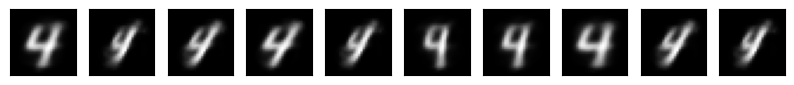

1/1 [==============================] - 0s 32ms/step


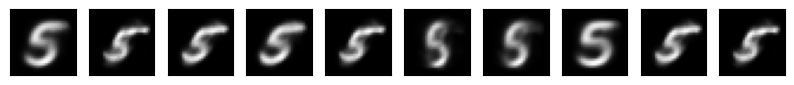

1/1 [==============================] - 0s 47ms/step


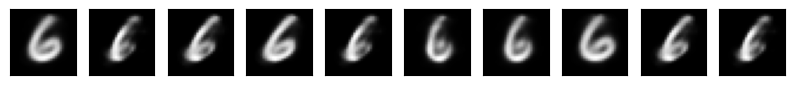

1/1 [==============================] - 0s 33ms/step


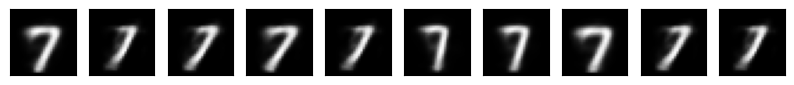

1/1 [==============================] - 0s 33ms/step


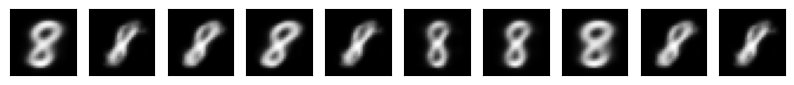

1/1 [==============================] - 0s 36ms/step


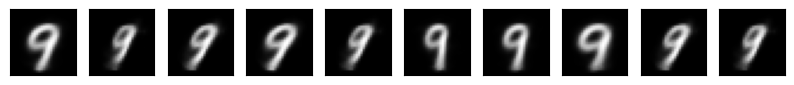

In [ ]:
dig1 = 5
dig2 = 2

num = 10
X = x_train[y_train == dig1][:num]

lb_1 = np.zeros((num, num_classes))
lb_1[:, dig1] = 1

plot_digits(X)

for i in range(num_classes):
  lb_2 = np.zeros((num, num_classes))
  lb_2[:, i] = 1

  Y = tr_style.predict([X, lb_1, lb_2], batch_size=num)
  plot_digits(Y)

# gan 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from tensorflow.keras.datasets import mnist
from tensorflow import keras
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Lambda, BatchNormalization, Dropout
from tensorflow.keras.layers import Conv2D, LeakyReLU

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train[y_train==7]
y_train = y_train[y_train==7]

BUFFER_SIZE = x_train.shape[0]
BATCH_SIZE = 100

length = BUFFER_SIZE // BATCH_SIZE * BATCH_SIZE
x_train = x_train[:length]
y_train = y_train[:length]
print(x_train.shape, y_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(6200, 28, 28) (6200,)


In [3]:
# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))


train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [6]:
def dropout_and_batch(x):
  return Dropout(0.3)(BatchNormalization()(x))

def noiser(args):
  global z_mean, z_log_var
  z_mean, z_log_var = args
  N = K.random_normal(shape=(BATCH_SIZE, hidden_dim), mean=0., stddev=1.0)
  return K.exp(z_log_var / 2) * N + z_mean

def generator_loss(fake_output):
  loss = cross_entropy(tf.ones_like(fake_output), fake_output)
  kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
  return (loss + kl_loss*0.1)


def discriminator_loss(real_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(real_output), real_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss



In [7]:
# формирование сетей
hidden_dim = 2

#экодер VAE
input_img = Input((28, 28, 1))
x = Flatten()(input_img)
x = Dense(256, activation='relu')(x)
x = dropout_and_batch(x)

z_mean = Dense(hidden_dim)(x)
z_log_var = Dense(hidden_dim)(x)


#скрытое пространство 
h = Lambda(noiser, output_shape=(hidden_dim,))([z_mean, z_log_var])

#декодер 
input_dec = Input(shape=(hidden_dim,))
d = Dense(256, activation='relu')(input_dec)
d = dropout_and_batch(d)
d = Dense(28*28, activation='sigmoid')(d)
decoded = Reshape((28, 28, 1))(d)


#получается генератор енкодер-декодер 
encoder = keras.Model(input_img, h, name='encoder')
decoder = keras.Model(input_dec, decoded, name='decoder')
generator = keras.Model(input_img, decoder(encoder(input_img)), name="generator")

# дискриминатор -- модель которую надо обмануть 
discriminator = tf.keras.Sequential()
discriminator.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
discriminator.add(LeakyReLU())
discriminator.add(Dropout(0.3))

discriminator.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
discriminator.add(LeakyReLU())
discriminator.add(Dropout(0.3))

discriminator.add(Flatten())
discriminator.add(Dense(1))


# потери
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [8]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [9]:
# обучение
@tf.function
def train_step(images):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator(images, training=True)

    real_output = discriminator(images, training=True)
    fake_output = discriminator(generated_images, training=True)

    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)

  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

  return gen_loss, disc_loss

In [10]:
def train(dataset, epochs):
  history = []
  MAX_PRINT_LABEL = 10
  th = BUFFER_SIZE // (BATCH_SIZE*MAX_PRINT_LABEL)

  n_epoch = 1
  for epoch in range(epochs):
    print(f'{n_epoch}/{EPOCHS}: ', end='')

    start = time.time()
    n = 0

    gen_loss_epoch = 0
    for image_batch in dataset:
      gen_loss, disc_loss = train_step(image_batch)
      gen_loss_epoch += K.mean(gen_loss)
      if( n % th == 0): print('=', end='')
      n += 1

    history += [gen_loss_epoch/n]
    print(': '+str(history[-1]))
    print ('Время эпохи {} в {} секундах'.format(epoch + 1, time.time()-start))
    
    n_epoch += 1
  return history

In [11]:

# запуск процесса обучения
EPOCHS = 50

history = train(train_dataset, EPOCHS)


h = encoder.predict(x_test[:6000], batch_size=BATCH_SIZE)
plt.scatter(h[:, 0], h[:, 1])

plt.plot(history)
plt.grid(True)

# отображение результатов генерации
n = 2
total = 2*n+1

plt.figure(figsize=(total, total))

num = 1
for i in range(-n, n+1):
  for j in range(-n, n+1):
    ax = plt.subplot(total, total, num)
    num += 1
    img = decoder.predict(np.expand_dims([0.5*i/n, 0.5*j/n], axis=0))
    plt.imshow(img.squeeze(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

1/50: 

KeyboardInterrupt: ignored